# **Part 1**

### **University curriculum**

In [10]:
#Filled manually by me from our university curriculum (Zewail city university)
full_courses = {
    "CSAI100": {"title": "Intro to Computational Sciences and AI", "credits": 1, "prerequisites": [], "category": "Core"},
    "CSAI101": {"title": "Fundamentals of Programming", "credits": 2, "prerequisites": [], "category": "Core"},
    "CSAI102": {"title": "Digital Logic & Computer Architecture", "credits": 3, "prerequisites": [], "category": "Core"},
    "CSAI151": {"title": "Object-Oriented Programming", "credits": 3, "prerequisites": ["CSAI101"], "category": "Core"},
    "CSAI201": {"title": "Data Structures", "credits": 3, "prerequisites": ["CSAI151"], "category": "Core"},
    "CSAI202": {"title": "Intro to Database Systems", "credits": 3, "prerequisites": ["CSAI151"], "category": "Core"},
    "CSAI203": {"title": "Intro to Software Engineering", "credits": 3, "prerequisites": ["CSAI101"], "category": "Core"},
    "CSAI204": {"title": "Operating Systems", "credits": 3, "prerequisites": ["CSAI201"], "category": "SWD"},
    "CSAI252": {"title": "Intro to Computer Networks", "credits": 3, "prerequisites": [], "category": "Core"},
    "CSAI253": {"title": "Machine Learning", "credits": 3, "prerequisites": ["CSAI201", "MATH105"], "category": "Core"},
    "CSAI301": {"title": "Artificial Intelligence", "credits": 3, "prerequisites": ["CSAI201"], "category": "Core"},
    "CSAI351": {"title": "Secure Computing", "credits": 3, "prerequisites": ["CSAI201"], "category": "Core"},
    "MATH103": {"title": "Calculus", "credits": 3, "prerequisites": [], "category": "Core"},
    "MATH104": {"title": "Linear Algebra", "credits": 3, "prerequisites": [], "category": "Core"},
    "MATH105": {"title": "Probability & Statistics", "credits": 3, "prerequisites": ["MATH103"], "category": "Core"},
    "MATH205": {"title": "Discrete Math", "credits": 3, "prerequisites": [], "category": "Core"},
    "SW151": {"title": "Computer Architecture", "credits": 3, "prerequisites": ["CSAI102"], "category": "SWD"},
    "SW251": {"title": "UX and Interaction Design", "credits": 3, "prerequisites": ["CSAI203"], "category": "SWD"},
    "SW252": {"title": "Embedded Systems", "credits": 3, "prerequisites": ["SW151"], "category": "SWD"},
    "SW301": {"title": "OO Analysis & Design", "credits": 3, "prerequisites": ["CSAI151"], "category": "SWD"},
    "SW302": {"title": "UI Development", "credits": 3, "prerequisites": ["SW251"], "category": "SWD"},
    "SW401": {"title": "Parallel Computing", "credits": 3, "prerequisites": ["CSAI151"], "category": "SWD"},
    "SW402": {"title": "Software Project Mgmt", "credits": 3, "prerequisites": ["CSAI203"], "category": "SWD"},
    "SWAPD301": {"title": "Requirements Development", "credits": 3, "prerequisites": ["CSAI203"], "category": "SWD"},
    "SWAPD351": {"title": "Architecture & Design", "credits": 3, "prerequisites": ["SWAPD301"], "category": "SWD"},
    "SWAPD352": {"title": "Web App Development", "credits": 3, "prerequisites": ["CSAI202"], "category": "SWD"},
    "SWAPD402": {"title": "Mobile App Development", "credits": 3, "prerequisites": ["CSAI201"], "category": "SWD"},
    "SWAPD452": {"title": "Enterprise App Development", "credits": 3, "prerequisites": ["CSAI202"], "category": "SWD"},
    "SWAPD453": {"title": "IoT App Development", "credits": 3, "prerequisites": ["CSAI252"], "category": "SWD"},
}

In [11]:
import networkx as nx
G = nx.DiGraph()

# Add nodes and edges based on the curriculum
for course_id, info in full_courses.items():
    G.add_node(course_id, **info)
    for prereq in info["prerequisites"]:
        G.add_edge(prereq, course_id)

C:\Users\Ahmed Mohsen\AppData\Local\Temp\ipykernel_37400\4258603073.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


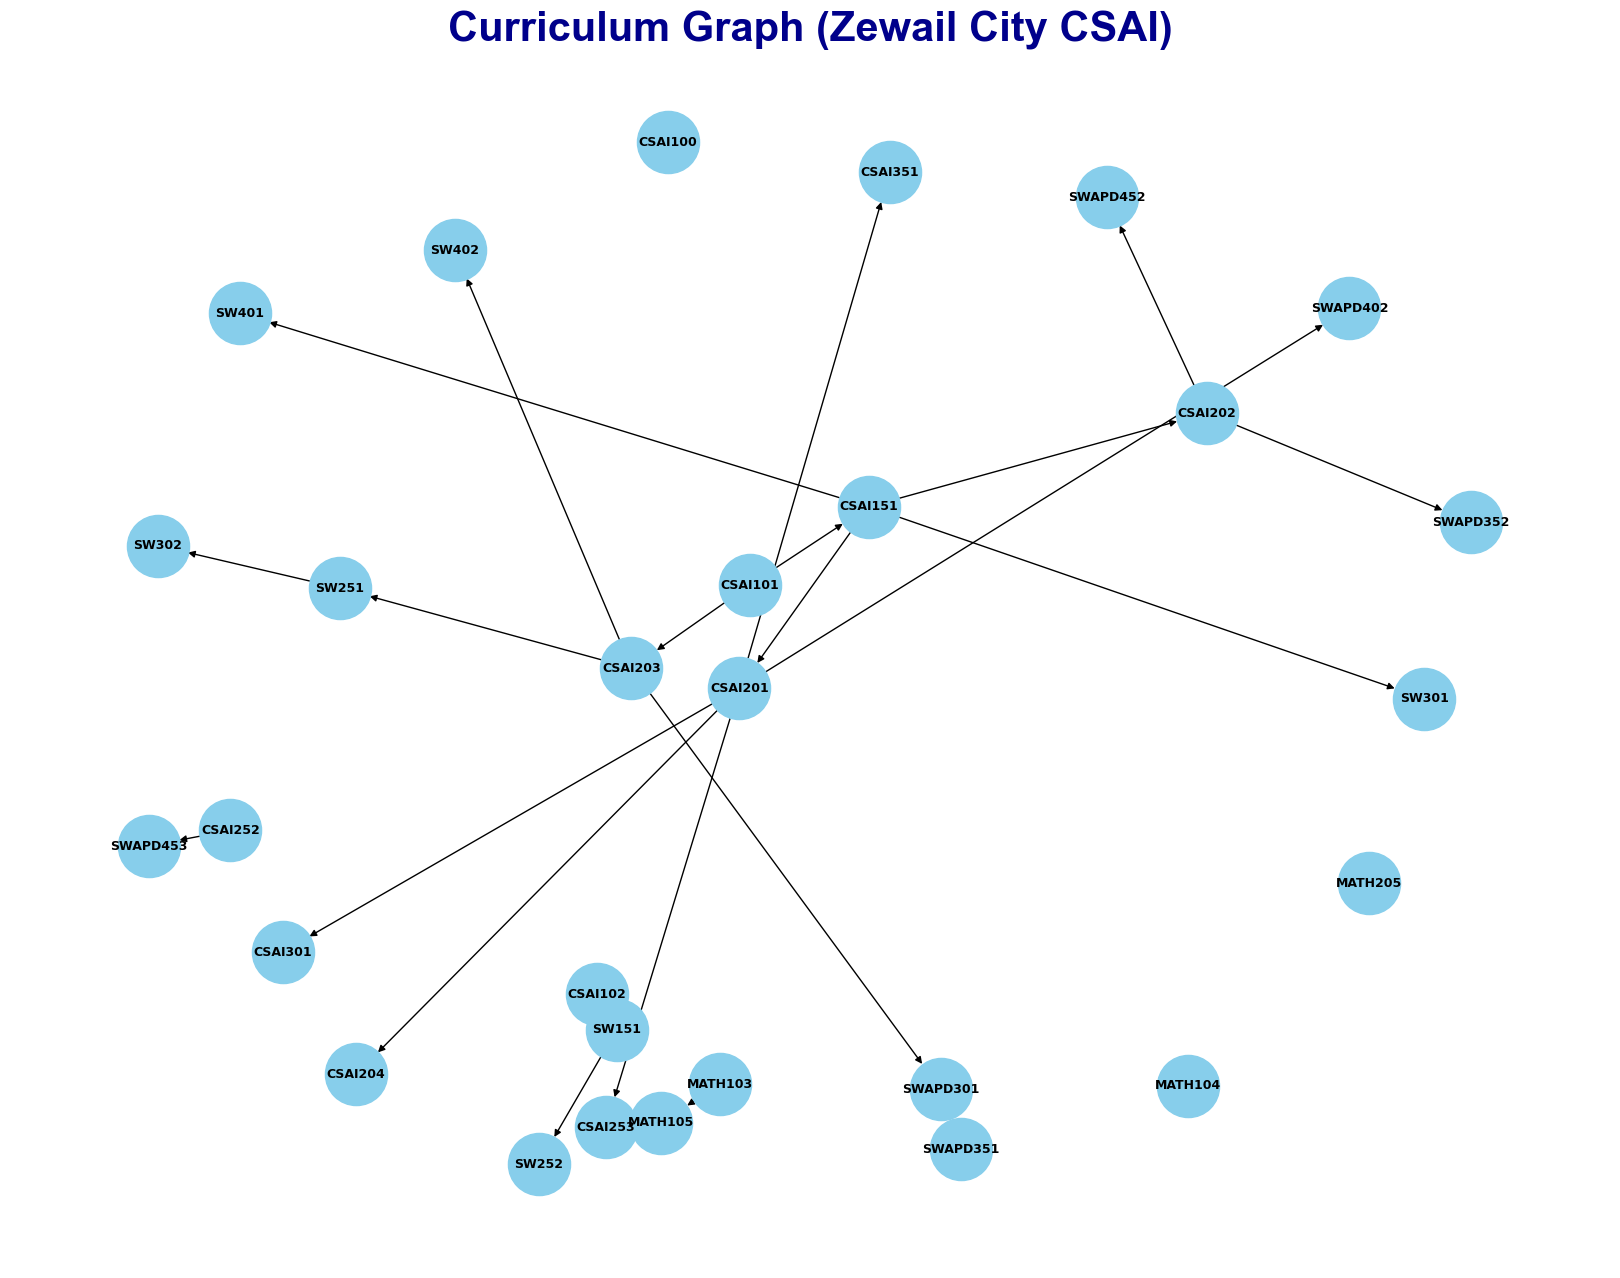

In [12]:
import matplotlib.pyplot as plt

#Drawing the graph
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(16, 12))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=9, font_weight='bold')
edge_labels = {}
for edge in G.edges():
    u, v = edge
    edge_labels[(u, v)] = ""
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Curriculum Graph (Zewail City CSAI)", fontsize=30, fontweight='bold', pad=20, fontdict={'family': 'Arial', 'color': 'darkblue'})
plt.axis("off")
plt.tight_layout()
plt.show()

### **Students generated data**

In [13]:
def calculate_gpa(grades):
    scoring = {
    'A': 4.0,
    'A-': 3.7,
    'B+': 3.3,
    'B': 3.0,
    'B-': 2.7,
    'C+': 2.3,
    'C': 2.0,
    'C-': 1.7,
    'F': 0.0
}
    if not grades:
        return 0.0
    total_points = 0.0  
    total_courses = 0   
    for course, grade in grades.items():
        grade_point = scoring.get(grade, 0.0)  
        total_points += grade_point
        total_courses += 1
    gpa = total_points / total_courses
    return round(gpa, 2)

In [14]:
import random

def random_grade(passed=True):
    if passed:
        grade_options = ['A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-']
        weights = [0.15, 0.15, 0.3, 0.25, 0.1, 0.05, 0.07, 0.03]
        selected_grade = random.choices(grade_options, weights=weights, k=1)[0]
        return selected_grade
    else:
        return 'F'


In [15]:
import numpy as np

def simulate_students(n=100, max_terms=6):
    random.seed(42)
    np.random.seed(42)
    students = [] 
    courses_names = list(full_courses.keys())  
    interests_list = ["AI", "Security", "Data Science", "Networks", "HCI", "Software Engineering"]
    for sid in range(1, n + 1):
        completed = set()  
        grades = {}        
        taken = set()      
        num_terms = random.randint(2, max_terms)
        for term in range(num_terms):
            eligible_courses = []
            for course in courses_names:
                if course in taken:
                    continue
                prerequisites = full_courses[course]["prerequisites"]
                has_completed_all_prereqs = True
                for prereq in prerequisites:
                    if prereq not in completed:
                        has_completed_all_prereqs = False # This is the second constraint: must complete all prerequisites
                        break 
                if has_completed_all_prereqs:
                    eligible_courses.append(course)

            num_courses_this_term = random.randint(3, 5) # This is the first constraint: 3 to 5 courses per term
            term_courses = random.sample(eligible_courses, min(len(eligible_courses), num_courses_this_term))

            for course in term_courses:
                passed = random.random() > 0.05
                grade = random_grade(passed)
                grades[course] = grade
                taken.add(course)
                if passed:
                    completed.add(course)

        gpa = calculate_gpa(grades)

        interests = random.sample(interests_list, k=random.randint(1, 3))

        student_record = {
            "student_id": sid,
            "completed_courses": list(completed),
            "grades": grades,
            "GPA": gpa,
            "interests": interests
        }

        students.append(student_record)

    return students


In [16]:
import json 
students_data = simulate_students()

#Saving it to a json file
with open("simulated_students.json", "w") as f:
    json.dump(students_data, f, indent=2)


# **Part 2**

In [ ]:
#A simple heuristic-based course recommender
def recommend_courses(student, curriculum, max_courses=5):
    completed = set(student["completed_courses"])
    interests = set(student["interests"])
    
    #Eligible courses: not taken and prerequisites are completed
    eligible_courses = [
        cid for cid, info in curriculum.items() 
        if cid not in student["grades"] and all(prereq in completed for prereq in info["prerequisites"])
    ]

    #Score by interest
    def course_score(cid):
        category = curriculum[cid]["category"]
        return 1 if any(interest in category for interest in interests) else 0

    ranked_courses = sorted(eligible_courses, key=course_score, reverse=True)
    recommended = ranked_courses[:min(len(ranked_courses), max_courses)]
    return recommended


In [24]:
recommendations = []
for s in students_data:
    recs = recommend_courses(s, full_courses)
    recommendations.append({
        "student_id": s["student_id"],
        "recommended_courses": recs
    })

recommendations

[{'student_id': 1,
  'recommended_courses': ['CSAI201',
   'CSAI202',
   'CSAI203',
   'CSAI252',
   'MATH103']},
 {'student_id': 2,
  'recommended_courses': ['CSAI301', 'CSAI351', 'SWAPD352', 'SWAPD402']},
 {'student_id': 3,
  'recommended_courses': ['CSAI202',
   'CSAI253',
   'CSAI301',
   'SW252',
   'SWAPD351']},
 {'student_id': 4,
  'recommended_courses': ['CSAI202',
   'CSAI204',
   'CSAI301',
   'CSAI351',
   'MATH105']},
 {'student_id': 5,
  'recommended_courses': ['CSAI151', 'CSAI203', 'MATH105', 'SW151']},
 {'student_id': 6,
  'recommended_courses': ['CSAI201', 'CSAI202', 'MATH103', 'SW151', 'SW251']},
 {'student_id': 7,
  'recommended_courses': ['CSAI201', 'MATH105', 'SW151', 'SW251', 'SW301']},
 {'student_id': 8,
  'recommended_courses': ['CSAI201',
   'CSAI202',
   'CSAI203',
   'CSAI252',
   'MATH105']},
 {'student_id': 9,
  'recommended_courses': ['CSAI151', 'MATH105', 'SW151', 'SW302', 'SWAPD301']},
 {'student_id': 10,
  'recommended_courses': ['CSAI201', 'SW251', 'SW2